# 02 - Data Analysis

Data Analysis on final DF

## Preliminaires 

### System 

In [1]:
cd ../

/home/alex/tmp/Global-Biodiversity-Score


/home/alex/tmp/Global-Biodiversity-Score/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
pwd

'/home/alex/tmp/Global-Biodiversity-Score'

### Imports

In [3]:
import os, sys, logging
from IPython.display import display, HTML

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [9]:
from gbs.etl.loader import Loader

### Data

In [10]:
df = Loader.final()

## First Tour

### Display

In [11]:
df.head()

,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita
0,W.Europe,Austria,AUT,278340.0,0.002951,821.336665,8879920.0,50067.585727
1,W.Europe,Belgium,BEL,203760.0,0.001293,263.487603,11488980.0,46641.721402
2,C.Europe,Bulgaria,BGR,1198680.0,0.002051,2458.682230,6975761.0,9874.336326
3,C.Europe,Croatia,HRV,143150.0,0.001951,279.286771,4065253.0,15120.902903
4,C.Europe,Cyprus,CYP,10590.0,0.005020,53.158405,1228836.0,29420.000000


In [12]:
df.tail()

,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita
23,C.Europe,NaN,NaN,2168370.0,0.002257,4894.011460,NaN,NaN
24,C.Europe,Slovak Republic,SVK,406820.0,0.002473,1006.038374,5454147.0,19381.890547
25,C.Europe,Slovenia,SVN,26730.0,0.003011,80.494948,2088385.0,26042.446347
26,W.Europe,Spain,ESP,1920090.0,0.004999,9598.675435,47134837.0,29581.518551
27,W.Europe,Sweden,SWE,469490.0,0.003187,1496.449831,10278887.0,51939.429745


In [13]:
df.sample(10)

,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita
18,W.Europe,Luxembourg,LUX,13360.0,0.002040,27.252406,620001.0,112726.439673
15,C.Europe,Latvia,LVA,492700.0,0.002505,1234.308486,1913822.0,17883.349411
4,C.Europe,Cyprus,CYP,10590.0,0.005020,53.158405,1228836.0,29420.000000
6,W.Europe,Denmark,DNK,573400.0,0.001343,770.322745,5814422.0,59592.980689
23,C.Europe,NaN,NaN,2168370.0,0.002257,4894.011460,NaN,NaN
17,C.Europe,Lithuania,LTU,27610.0,0.002251,62.160102,2794137.0,19615.549145
26,W.Europe,Spain,ESP,1920090.0,0.004999,9598.675435,47134837.0,29581.518551
19,C.Europe,Malta,MLT,0.0,0.002075,0.000000,504062.0,31727.007075
11,W.Europe,Greece,GRC,350490.0,0.004425,1550.828523,10721582.0,19143.887617
3,C.Europe,Croatia,HRV,143150.0,0.001951,279.286771,4065253.0,15120.902903


### Structure

In [14]:
df.shape

(28, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          28 non-null     object 
 1   country_name    27 non-null     object 
 2   country_code    27 non-null     object 
 3   km2             26 non-null     float64
 4   sum_msa_static  28 non-null     float64
 5   msa.km2         26 non-null     float64
 6   population      27 non-null     float64
 7   gdp_per_capita  27 non-null     float64
dtypes: float64(5), object(3)
memory usage: 1.9+ KB


In [16]:
df.dtypes

region             object
country_name       object
country_code       object
km2               float64
sum_msa_static    float64
msa.km2           float64
population        float64
gdp_per_capita    float64
dtype: object

In [17]:
df.dtypes.value_counts()

float64    5
object     3
Name: count, dtype: int64

In [18]:
df.nunique()

region             2
country_name      26
country_code      26
km2               26
sum_msa_static    27
msa.km2           26
population        26
gdp_per_capita    26
dtype: int64

### Missing Values

In [19]:
df

,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita
0,W.Europe,Austria,AUT,278340.0,0.002951,821.336665,8879920.0,50067.585727
1,W.Europe,Belgium,BEL,203760.0,0.001293,263.487603,11488980.0,46641.721402
2,C.Europe,Bulgaria,BGR,1198680.0,0.002051,2458.682230,6975761.0,9874.336326
3,C.Europe,Croatia,HRV,143150.0,0.001951,279.286771,4065253.0,15120.902903
4,C.Europe,Cyprus,CYP,10590.0,0.005020,53.158405,1228836.0,29420.000000
5,C.Europe,Czechia,CZE,NaN,0.002068,NaN,10671870.0,23664.847863
6,W.Europe,Denmark,DNK,573400.0,0.001343,770.322745,5814422.0,59592.980689
7,C.Europe,Estonia,EST,166980.0,0.002742,457.916824,1326898.0,23424.484707
8,W.Europe,Finland,FIN,197600.0,0.006413,1267.182502,5521606.0,48629.858228
9,W.Europe,France,FRA,5244250.0,0.001674,8778.389602,67388001.0,40494.898294


In [20]:
df.isna().sum(axis=1)

0     0
1     0
2     0
3     0
4     0
5     2
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    2
21    0
22    0
23    4
24    0
25    0
26    0
27    0
dtype: int64

In [21]:
tmp = df.isna().sum(axis=1)
tmp[tmp == 0]

0     0
1     0
2     0
3     0
4     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
21    0
22    0
24    0
25    0
26    0
27    0
dtype: int64

In [22]:
df = df.loc[tmp[tmp == 0].index]
df

,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita
0,W.Europe,Austria,AUT,278340.0,0.002951,821.336665,8879920.0,50067.585727
1,W.Europe,Belgium,BEL,203760.0,0.001293,263.487603,11488980.0,46641.721402
2,C.Europe,Bulgaria,BGR,1198680.0,0.002051,2458.682230,6975761.0,9874.336326
3,C.Europe,Croatia,HRV,143150.0,0.001951,279.286771,4065253.0,15120.902903
4,C.Europe,Cyprus,CYP,10590.0,0.005020,53.158405,1228836.0,29420.000000
6,W.Europe,Denmark,DNK,573400.0,0.001343,770.322745,5814422.0,59592.980689
7,C.Europe,Estonia,EST,166980.0,0.002742,457.916824,1326898.0,23424.484707
8,W.Europe,Finland,FIN,197600.0,0.006413,1267.182502,5521606.0,48629.858228
9,W.Europe,France,FRA,5244250.0,0.001674,8778.389602,67388001.0,40494.898294
10,W.Europe,Germany,DEU,3118100.0,0.001350,4208.301689,83092962.0,46805.138433


### Data Inspection

In [23]:
df.describe().round(4)

,km2,sum_msa_static,msa.km2,population,gdp_per_capita
count,2.500000e+01,25.0000,25.0000,2.500000e+01,25.0000
mean,8.444608e+05,0.0028,1991.1050,1.611092e+07,35522.7229
std,1.242196e+06,0.0015,2691.1202,2.330150e+07,23418.3379
min,0.000000e+00,0.0012,0.0000,5.040620e+05,9874.3363
25%,6.348000e+04,0.0020,190.7540,2.794137e+06,19381.8905
50%,3.504900e+05,0.0023,1006.0384,5.814422e+06,29420.0000
75%,1.015640e+06,0.0031,2016.6799,1.072158e+07,46805.1384
max,5.244250e+06,0.0067,9598.6754,8.309296e+07,112726.4397


In [24]:
df = df.loc[df["country_name"] != "Malta", :]
df

,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita
0,W.Europe,Austria,AUT,278340.0,0.002951,821.336665,8879920.0,50067.585727
1,W.Europe,Belgium,BEL,203760.0,0.001293,263.487603,11488980.0,46641.721402
2,C.Europe,Bulgaria,BGR,1198680.0,0.002051,2458.682230,6975761.0,9874.336326
3,C.Europe,Croatia,HRV,143150.0,0.001951,279.286771,4065253.0,15120.902903
4,C.Europe,Cyprus,CYP,10590.0,0.005020,53.158405,1228836.0,29420.000000
6,W.Europe,Denmark,DNK,573400.0,0.001343,770.322745,5814422.0,59592.980689
7,C.Europe,Estonia,EST,166980.0,0.002742,457.916824,1326898.0,23424.484707
8,W.Europe,Finland,FIN,197600.0,0.006413,1267.182502,5521606.0,48629.858228
9,W.Europe,France,FRA,5244250.0,0.001674,8778.389602,67388001.0,40494.898294
10,W.Europe,Germany,DEU,3118100.0,0.001350,4208.301689,83092962.0,46805.138433


## EDA

### Numercials

<Axes: >

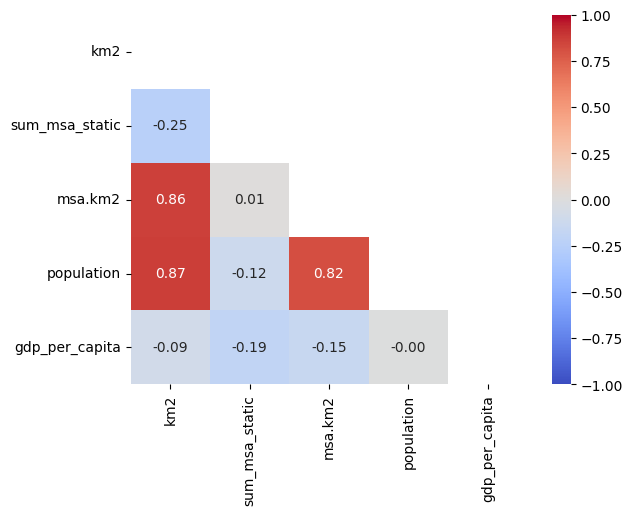

In [25]:
corr = df.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, mask=mask, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", annot=True
)

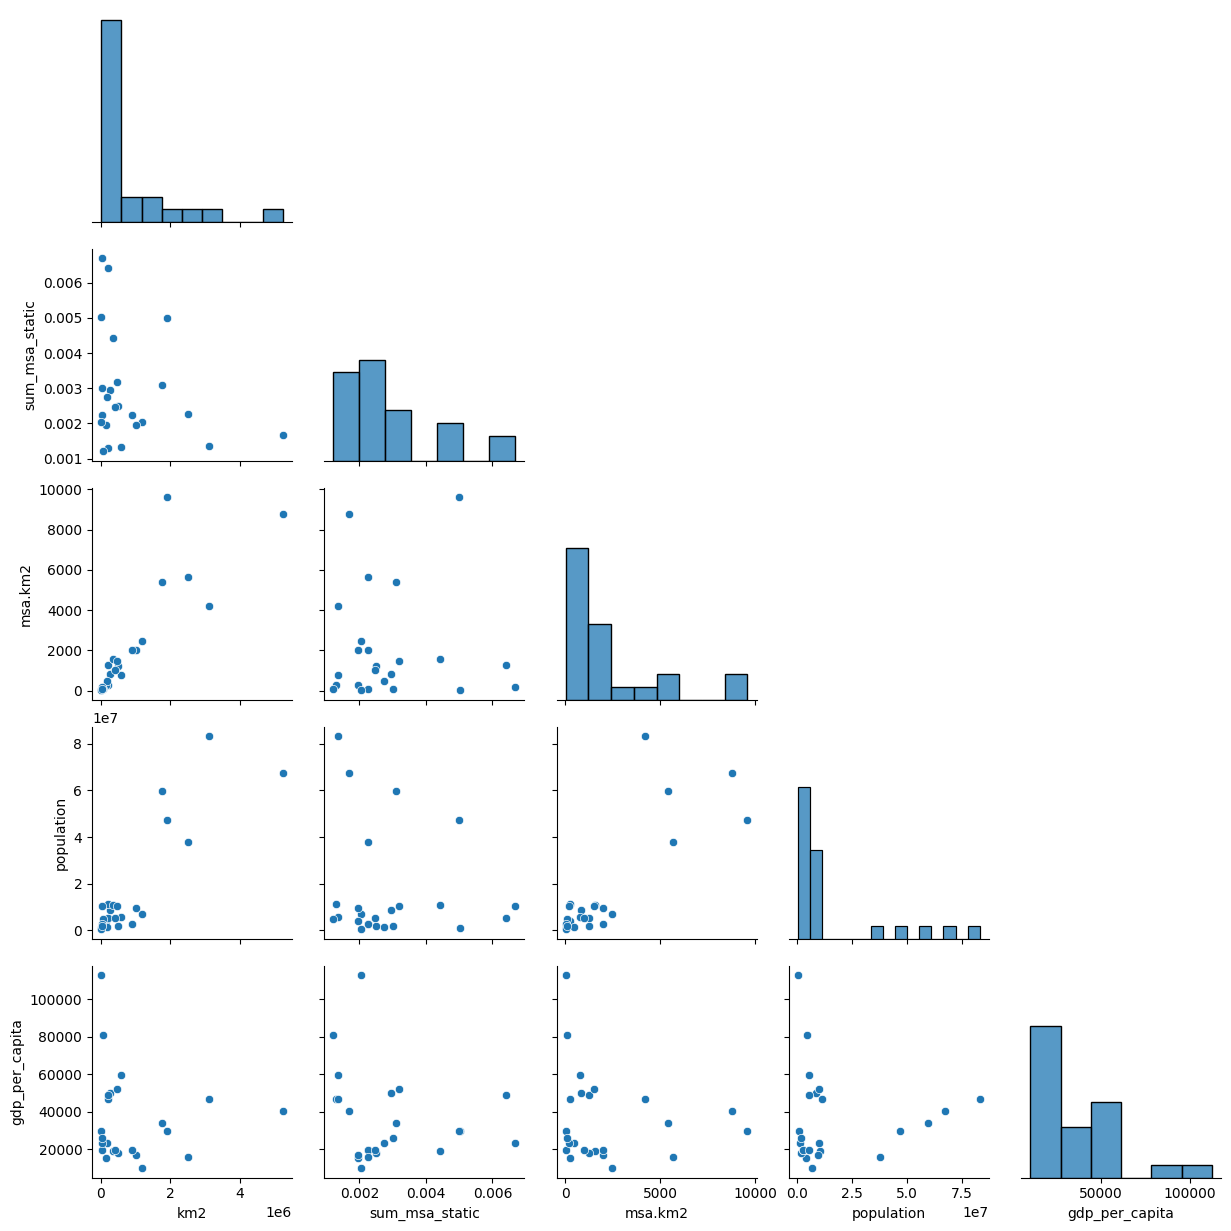

In [26]:
sns.pairplot(df, corner=True)

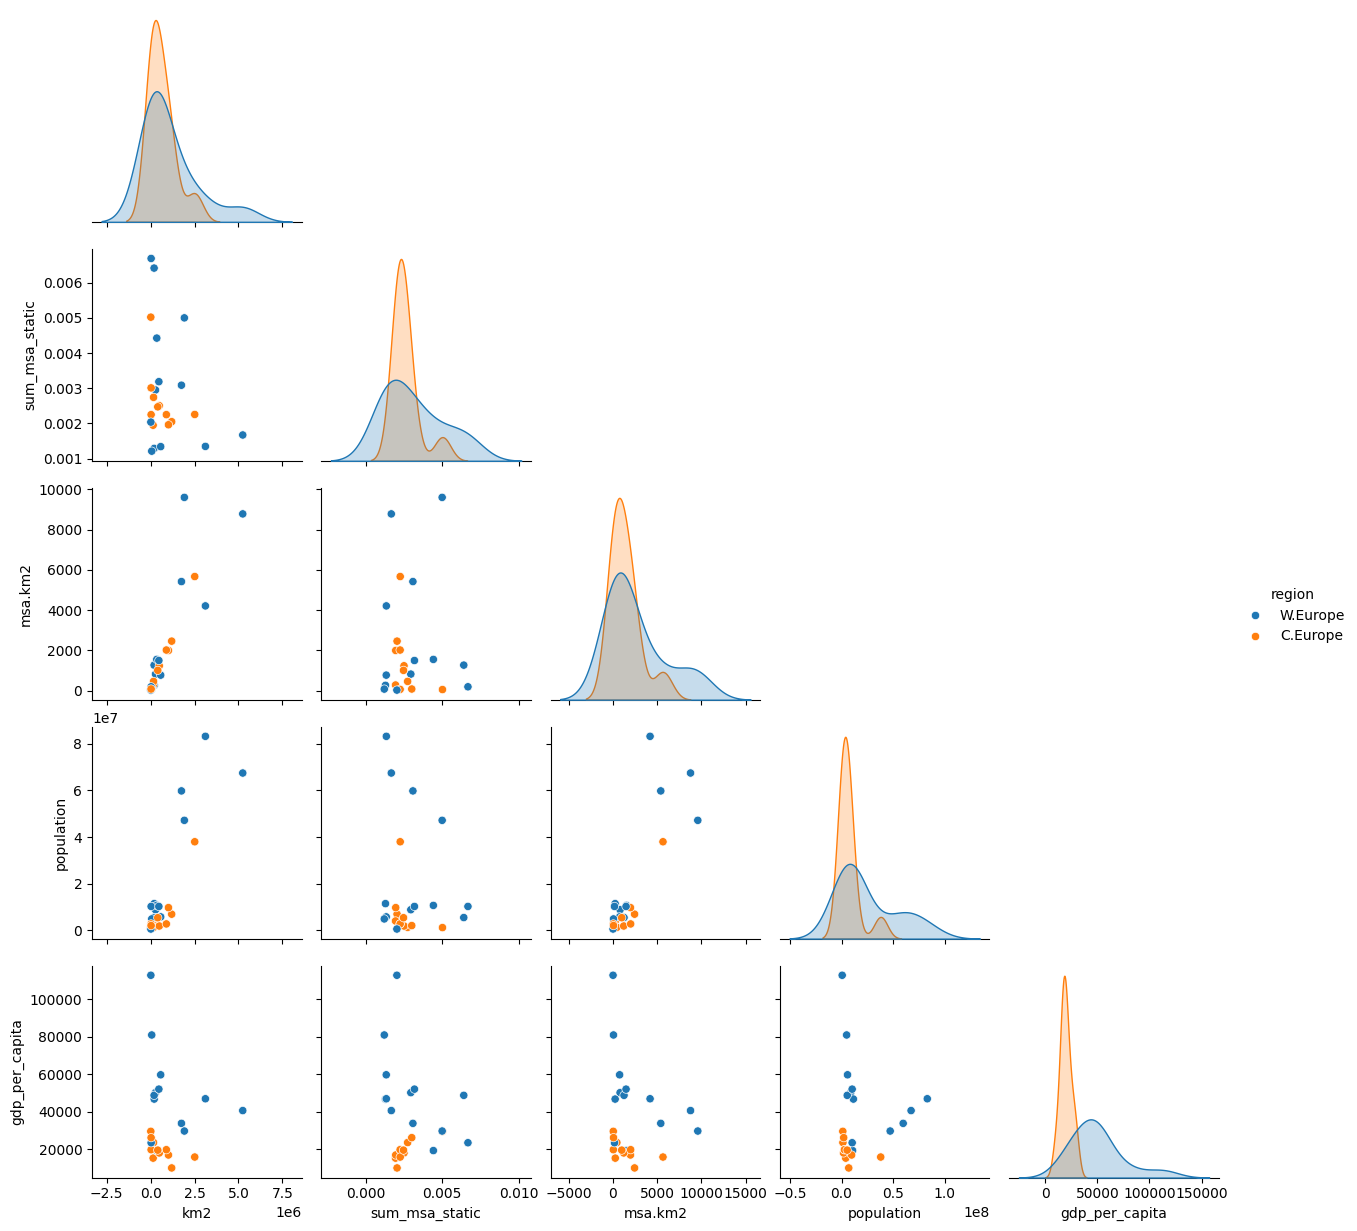

In [27]:
sns.pairplot(df, corner=True, hue="region")

In [28]:

for c in df.select_dtypes(np.number).columns:
    fig = px.box(df, x="region", y=c)
    fig.write_html(f".assets/graphs/boxplot_{c}.html")
    fig.show()

### Clustering

In [27]:
X_num = df.select_dtypes(np.number)
Xs = StandardScaler().fit_transform(X_num)
Xs = pd.DataFrame(Xs, columns=X_num.columns)
Xs.head()

,km2,sum_msa_static,msa.km2,population,gdp_per_capita
0,-0.488997,0.046400,-0.471136,-0.341572,0.614686
1,-0.549647,-1.052351,-0.680936,-0.228496,0.468312
2,0.259445,-0.549919,0.144649,-0.424098,-1.102609
3,-0.598936,-0.616300,-0.674994,-0.550239,-0.878444
4,-0.706737,1.417650,-0.760038,-0.673168,-0.267502


In [28]:
score_list = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xs)
    labels = kmeans.predict(Xs)
    score_list.append(
        {
            "k": k,
            "interia": kmeans.inertia_,
            "bd": davies_bouldin_score(Xs, labels),
            "silhouette": silhouette_score(Xs, labels),
        }
    )

In [29]:
score_list = pd.DataFrame(score_list)
score_list

,k,interia,bd,silhouette
0,2,61.974402,0.805321,0.508726
1,3,45.235258,0.834820,0.382570
2,4,29.868259,0.680021,0.420676
3,5,25.720556,0.755436,0.343087
4,6,18.809128,0.713997,0.383487
5,7,13.340102,0.624324,0.346380
6,8,13.146730,0.514170,0.311575
7,9,7.768943,0.519842,0.345333


In [30]:
for kpi in score_list.columns.to_list()[1:]:
    fig = px.line(score_list, x="k", y=kpi, title=kpi)
    fig.write_html(f".assets/graphs/{kpi}.html")
    fig.show()

In [31]:
k = 6

kmeans = KMeans(n_clusters=k)
kmeans.fit(Xs)
labels = kmeans.predict(Xs)
df["cluster"] = labels
df.cluster = df.cluster.apply(lambda x: f"c_{x}")
df

/tmp/ipykernel_268605/3930748249.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_268605/3930748249.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita,cluster
0,W.Europe,Austria,AUT,278340.0,0.002951,821.336665,8879920.0,50067.585727,c_2
1,W.Europe,Belgium,BEL,203760.0,0.001293,263.487603,11488980.0,46641.721402,c_2
2,C.Europe,Bulgaria,BGR,1198680.0,0.002051,2458.682230,6975761.0,9874.336326,c_0
3,C.Europe,Croatia,HRV,143150.0,0.001951,279.286771,4065253.0,15120.902903,c_5
4,C.Europe,Cyprus,CYP,10590.0,0.005020,53.158405,1228836.0,29420.000000,c_3
6,W.Europe,Denmark,DNK,573400.0,0.001343,770.322745,5814422.0,59592.980689,c_2
7,C.Europe,Estonia,EST,166980.0,0.002742,457.916824,1326898.0,23424.484707,c_5
8,W.Europe,Finland,FIN,197600.0,0.006413,1267.182502,5521606.0,48629.858228,c_3
9,W.Europe,France,FRA,5244250.0,0.001674,8778.389602,67388001.0,40494.898294,c_4
10,W.Europe,Germany,DEU,3118100.0,0.001350,4208.301689,83092962.0,46805.138433,c_1


In [32]:
df.sort_values(by="cluster", inplace=True, ascending=True)

for label in df.cluster.unique().tolist():
    print(f"Cluster {label}")
    print("____________________")
    display(df.loc[df.cluster == label, :])
    display(df.loc[df.cluster == label, :].describe().round(4))

Cluster c_0
____________________


/tmp/ipykernel_268605/3242340442.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita,cluster
12,C.Europe,Hungary,HUN,1015640.0,0.001964,1994.548254,9771141.0,16786.213640,c_0
2,C.Europe,Bulgaria,BGR,1198680.0,0.002051,2458.682230,6975761.0,9874.336326,c_0
16,C.Europe,Lithuania,LTU,895760.0,0.002251,2016.679936,2794137.0,19615.549145,c_0


,km2,sum_msa_static,msa.km2,population,gdp_per_capita
count,3.000000e+00,3.0000,3.0000,3.000000e+00,3.0000
mean,1.036693e+06,0.0021,2156.6368,6.513680e+06,15425.3664
std,1.525535e+05,0.0001,261.8130,3.511379e+06,5011.1611
min,8.957600e+05,0.0020,1994.5483,2.794137e+06,9874.3363
25%,9.557000e+05,0.0020,2005.6141,4.884949e+06,13330.2750
50%,1.015640e+06,0.0021,2016.6799,6.975761e+06,16786.2136
75%,1.107160e+06,0.0022,2237.6811,8.373451e+06,18200.8814
max,1.198680e+06,0.0023,2458.6822,9.771141e+06,19615.5491


Cluster c_1
____________________


,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita,cluster
21,C.Europe,Poland,POL,2511330.0,0.002257,5667.112756,37965475.0,15700.013580,c_1
14,W.Europe,Italy,ITA,1754640.0,0.003087,5417.137520,59729081.0,33673.750963,c_1
26,W.Europe,Spain,ESP,1920090.0,0.004999,9598.675435,47134837.0,29581.518551,c_1
10,W.Europe,Germany,DEU,3118100.0,0.001350,4208.301689,83092962.0,46805.138433,c_1


,km2,sum_msa_static,msa.km2,population,gdp_per_capita
count,4.000000e+00,4.0000,4.0000,4.000000e+00,4.0000
mean,2.326040e+06,0.0029,6222.8068,5.698059e+07,31440.1054
std,6.199421e+05,0.0016,2338.9897,1.956122e+07,12809.8692
min,1.754640e+06,0.0013,4208.3017,3.796548e+07,15700.0136
25%,1.878728e+06,0.0020,5114.9286,4.484250e+07,26111.1423
50%,2.215710e+06,0.0027,5542.1251,5.343196e+07,31627.6348
75%,2.663022e+06,0.0036,6650.0034,6.557005e+07,36956.5978
max,3.118100e+06,0.0050,9598.6754,8.309296e+07,46805.1384


Cluster c_2
____________________


,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita,cluster
18,W.Europe,Luxembourg,LUX,13360.0,0.002040,27.252406,620001.0,112726.439673,c_2
13,W.Europe,Ireland,IRL,63480.0,0.001215,77.119420,4934340.0,80848.301902,c_2
0,W.Europe,Austria,AUT,278340.0,0.002951,821.336665,8879920.0,50067.585727,c_2
6,W.Europe,Denmark,DNK,573400.0,0.001343,770.322745,5814422.0,59592.980689,c_2
1,W.Europe,Belgium,BEL,203760.0,0.001293,263.487603,11488980.0,46641.721402,c_2
27,W.Europe,Sweden,SWE,469490.0,0.003187,1496.449831,10278887.0,51939.429745,c_2


,km2,sum_msa_static,msa.km2,population,gdp_per_capita
count,6.0000,6.0000,6.0000,6.000000e+00,6.0000
mean,266971.6667,0.0020,575.9948,7.002758e+06,66969.4099
std,221253.1078,0.0009,564.4199,4.020274e+06,25555.9309
min,13360.0000,0.0012,27.2524,6.200010e+05,46641.7214
25%,98550.0000,0.0013,123.7115,5.154360e+06,50535.5467
50%,241050.0000,0.0017,516.9052,7.347171e+06,55766.2052
75%,421702.5000,0.0027,808.5832,9.929145e+06,75534.4716
max,573400.0000,0.0032,1496.4498,1.148898e+07,112726.4397


Cluster c_3
____________________


,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita,cluster
8,W.Europe,Finland,FIN,197600.0,0.006413,1267.182502,5521606.0,48629.858228,c_3
4,C.Europe,Cyprus,CYP,10590.0,0.005020,53.158405,1228836.0,29420.000000,c_3
22,W.Europe,Portugal,PRT,28530.0,0.006686,190.754005,10286263.0,23330.817289,c_3


,km2,sum_msa_static,msa.km2,population,gdp_per_capita
count,3.0000,3.0000,3.0000,3.000000e+00,3.0000
mean,78906.6667,0.0060,503.6983,5.678902e+06,33793.5585
std,103182.0790,0.0009,664.7663,4.530762e+06,13204.4075
min,10590.0000,0.0050,53.1584,1.228836e+06,23330.8173
25%,19560.0000,0.0057,121.9562,3.375221e+06,26375.4086
50%,28530.0000,0.0064,190.7540,5.521606e+06,29420.0000
75%,113065.0000,0.0065,728.9683,7.903934e+06,39024.9291
max,197600.0000,0.0067,1267.1825,1.028626e+07,48629.8582


Cluster c_4
____________________


,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita,cluster
9,W.Europe,France,FRA,5244250.0,0.001674,8778.389602,67388001.0,40494.898294,c_4


,km2,sum_msa_static,msa.km2,population,gdp_per_capita
count,1.0,1.0000,1.0000,1.0,1.0000
mean,5244250.0,0.0017,8778.3896,67388001.0,40494.8983
std,NaN,NaN,NaN,NaN,NaN
min,5244250.0,0.0017,8778.3896,67388001.0,40494.8983
25%,5244250.0,0.0017,8778.3896,67388001.0,40494.8983
50%,5244250.0,0.0017,8778.3896,67388001.0,40494.8983
75%,5244250.0,0.0017,8778.3896,67388001.0,40494.8983
max,5244250.0,0.0017,8778.3896,67388001.0,40494.8983


Cluster c_5
____________________


,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita,cluster
11,W.Europe,Greece,GRC,350490.0,0.004425,1550.828523,10721582.0,19143.887617,c_5
7,C.Europe,Estonia,EST,166980.0,0.002742,457.916824,1326898.0,23424.484707,c_5
15,C.Europe,Latvia,LVA,492700.0,0.002505,1234.308486,1913822.0,17883.349411,c_5
17,C.Europe,Lithuania,LTU,27610.0,0.002251,62.160102,2794137.0,19615.549145,c_5
3,C.Europe,Croatia,HRV,143150.0,0.001951,279.286771,4065253.0,15120.902903,c_5
24,C.Europe,Slovak Republic,SVK,406820.0,0.002473,1006.038374,5454147.0,19381.890547,c_5
25,C.Europe,Slovenia,SVN,26730.0,0.003011,80.494948,2088385.0,26042.446347,c_5


,km2,sum_msa_static,msa.km2,population,gdp_per_capita
count,7.000,7.0000,7.0000,7.000000e+00,7.0000
mean,230640.000,0.0028,667.2906,4.052032e+06,20087.5015
std,186452.149,0.0008,594.6701,3.263064e+06,3599.3806
min,26730.000,0.0020,62.1601,1.326898e+06,15120.9029
25%,85380.000,0.0024,179.8909,2.001104e+06,18513.6185
50%,166980.000,0.0025,457.9168,2.794137e+06,19381.8905
75%,378655.000,0.0029,1120.1734,4.759700e+06,21520.0169
max,492700.000,0.0044,1550.8285,1.072158e+07,26042.4463


In [33]:
for col in df.select_dtypes(np.number).columns.to_list():
    fig = px.box(df, x="cluster", y=col, title=col)
    fig.write_html(f".assets/graphs/boxplot_per_cluster_{col}.html")
    fig.show()

**[!!!]**

Please not that Cluserting stability is not formally tested here. 
We can asume that the clusters are **not** stable enough for our purpose.

### Maps

In [34]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

/tmp/ipykernel_268605/1460424072.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [35]:
eu_countries = df["country_code"].values.tolist()
eu = world[world["iso_a3"].isin(eu_countries)]
eu.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
113,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
114,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
115,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024..."


In [36]:
merged_data = eu.merge(df, left_on="iso_a3", right_on="country_code")
merged_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,region,country_name,country_code,km2,sum_msa_static,msa.km2,population,gdp_per_capita,cluster
0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",W.Europe,France,FRA,5244250.0,0.001674,8778.389602,67388001.0,40494.898294,c_4
1,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",W.Europe,Sweden,SWE,469490.0,0.003187,1496.449831,10278887.0,51939.429745,c_2
2,37970874.0,Europe,Poland,POL,595858,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",C.Europe,Poland,POL,2511330.0,0.002257,5667.112756,37965475.0,15700.013580,c_1
3,8877067.0,Europe,Austria,AUT,445075,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",W.Europe,Austria,AUT,278340.0,0.002951,821.336665,8879920.0,50067.585727,c_2
4,9769949.0,Europe,Hungary,HUN,163469,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",C.Europe,Hungary,HUN,1015640.0,0.001964,1994.548254,9771141.0,16786.213640,c_0


In [37]:
fig = px.choropleth(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color="cluster",
    color_continuous_scale="Viridis",
    scope="europe",
    # labels={"your_GDP_column": "GDP"},
)
fig.write_html(".assets/graphs/choropleth_per_cluster.html")
fig.show()

In [38]:
fig = px.choropleth(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color="msa.km2",
    color_continuous_scale="Viridis",
    scope="europe",
    labels={"your_GDP_column": "GDP"},
)
fig.write_html(".assets/graphs/choropleth_per_msa.html")
fig.show()